# 省市消费聚类和人脸识别

## 机器学习的基本概念
- 机器学习分为：监督学习、无监督学习、强化学习、深度学习  
- 监督学习（有指导学习）： 数据有标签的，有结果的。例如：分类和回归  
- 无监督学习（无指导学习）： 数据没有标签，没有结果的。例如：聚类  
- 强化学习  
- 深度学习： 多层神经网络  

## 省市消费聚类

In [1]:
# 读取数据
# 1、Pandas读取
import pandas as pd
data = pd.read_csv("data/city.txt",header=None,encoding="gbk")
cityNames = data.iloc[:,0].values
datas = data.iloc[:,1:].values

In [9]:
# 2、Python读文件的方式
fr = open("data/city.txt","r",encoding="gbk")
lines = fr.readlines()
names = []
datas = []
for lines in lines:
    items = lines.strip().split(",")
    names.append(items[0])
    datas.append([float(items[i]) for i in range(1,len(items))])
fr.close()
print(names)
print(datas)

['北京', '天津', '河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '上海', '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖南', '湖北', '广东', '广西', '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西', '甘肃', '青海', '宁夏', '新疆']
[[2959.19, 730.79, 749.41, 513.34, 467.87, 1141.82, 478.42, 457.64], [2459.77, 495.47, 697.33, 302.87, 284.19, 735.97, 570.84, 305.08], [1495.63, 515.9, 362.37, 285.32, 272.95, 540.58, 364.91, 188.63], [1406.33, 477.77, 290.15, 208.57, 201.5, 414.72, 281.84, 212.1], [1303.97, 524.29, 254.83, 192.17, 249.81, 463.09, 287.87, 192.96], [1730.84, 553.9, 246.91, 279.81, 239.18, 445.2, 330.24, 163.86], [1561.86, 492.42, 200.49, 218.36, 220.69, 459.62, 360.48, 147.76], [1410.11, 510.71, 211.88, 277.11, 224.65, 376.82, 317.61, 152.85], [3712.31, 550.74, 893.37, 346.93, 527.0, 1034.98, 720.33, 462.03], [2207.58, 449.37, 572.4, 211.92, 302.09, 585.23, 429.77, 252.54], [2629.16, 557.32, 689.73, 435.69, 514.66, 795.87, 575.76, 323.36], [1844.78, 430.29, 271.28, 126.33, 250.56, 513.18, 314.0, 151.39], [2709.46, 42

In [10]:
#聚类模型：KMeans算法
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(datas)
print(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [11]:
#用学习好的模型进行聚类
labels = km.fit_predict(datas)
print(labels)

[2 1 0 0 0 0 0 0 2 3 1 3 1 0 0 0 3 3 4 3 3 1 3 0 3 1 0 0 0 0 0]


In [16]:
#显示聚类结果
cityCluster = [[],[],[],[],[]]
for i in range(len(names)):
    cityCluster[labels[i]].append(names[i])
for i in range(len(cittCluster)):
    print(cityCluster[i])

['河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '江西', '山东', '河南', '贵州', '陕西', '甘肃', '青海', '宁夏', '新疆']
['天津', '浙江', '福建', '重庆', '西藏']
['北京', '上海']
['江苏', '安徽', '湖南', '湖北', '广西', '海南', '四川', '云南']
['广东']


## 人脸识别

In [19]:
#人脸数据集需要在线获取
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


In [20]:
#观察数据集
X, y, images = faces["data"],faces["target"],faces["images"]
print(X.shape)
print(images.shape)

(400, 4096)
(400, 64, 64)


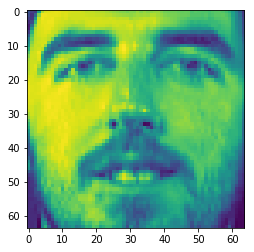

10


In [22]:
#显示图像
import matplotlib.pyplot as plt
plt.imshow(images[100])
plt.show()
print(y[100])

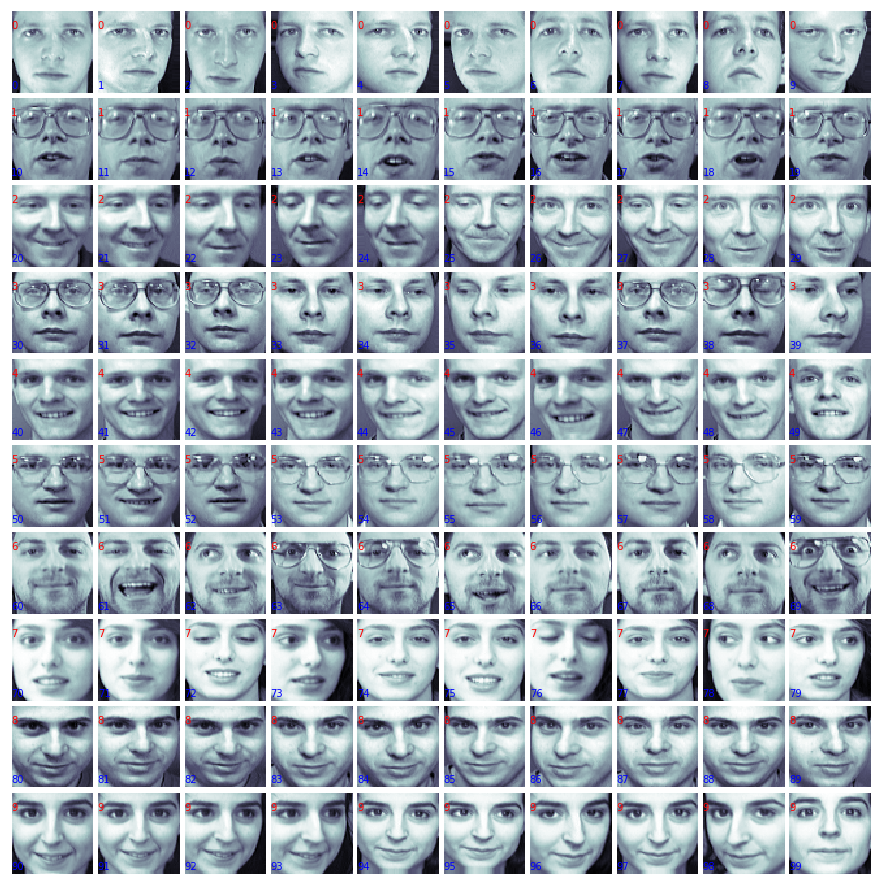

In [24]:
#显示一堆人脸
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left = 0, right =1, bottom = 0, top = 1, hspace = 0.05, wspace = 0)

for i in range(100):
    p = fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    p.imshow(images[i],cmap=plt.cm.bone)
    p.text(0,14,str(y[i]),color="red")
    p.text(0,60,str(i),color="blue")
plt.show()

In [25]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
#采用支持向量机模型进行分类
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("SVM 测试集准确率:{}".format(svc.score(X_test,y_test)))
print("SVM 训练集准确率:{}".format(svc.score(X_train,y_train)))

SVM 测试集准确率:0.99
SVM 训练集准确率:1.0


In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("KNN 测试集准确率:{}".format(knn.score(X_test,y_test)))
print("KNN 训练集准确率:{}".format(knn.score(X_train,y_train)))

KNN 测试集准确率:0.95
KNN 训练集准确率:1.0


In [31]:
#RandomForest:随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_split=2,n_estimators=16,n_jobs=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("随机森林测试集准确率:{}".format(rf.score(X_test,y_test)))
print("随机森林训练集准确率:{}".format(rf.score(X_train,y_train)))
print(rf)

随机森林测试集准确率:0.86
随机森林训练集准确率:1.0
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=0.03)
ada.fit(X_train,y_train)
print("测试集准确率:{}".format(ada.score(X_test,y_test)))
print("训练集准确率:{}".format(ada.score(X_train,y_train)))
print(ada)

测试集准确率:0.45
训练集准确率:0.7966666666666666
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.03, n_estimators=50, random_state=None)


** 过拟合和欠拟合 ：泛化能力**

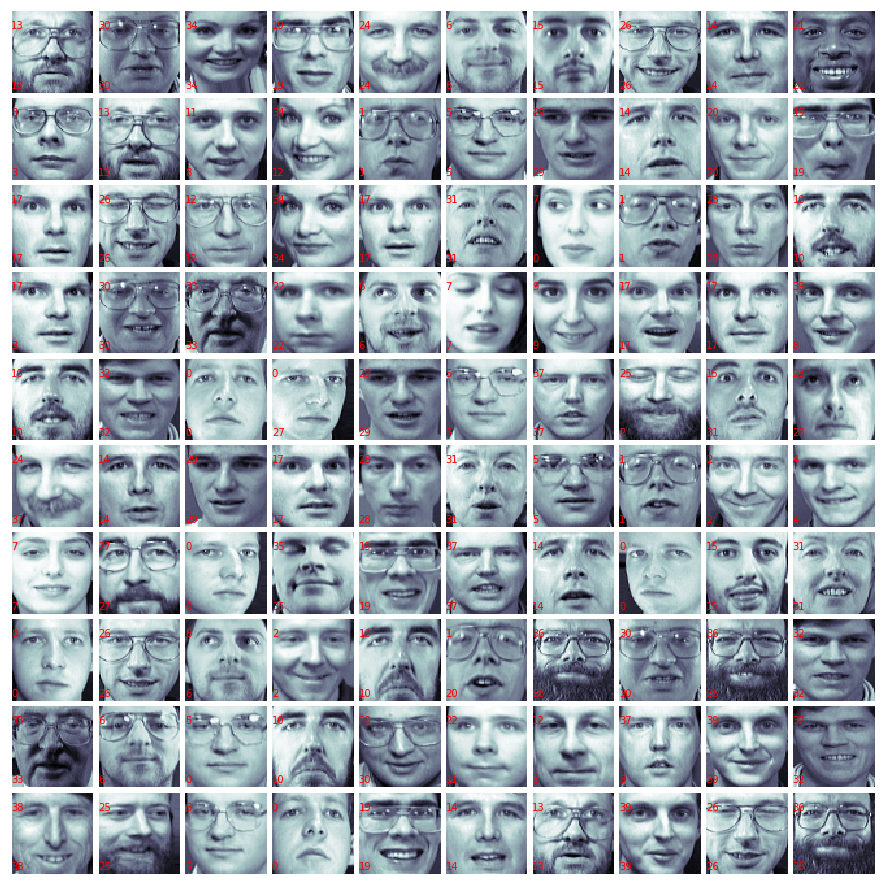

In [35]:
#显示测试集的图像来进行对比
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05 )

for i in range(100):
    p = fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    p.imshow(X_test[i].reshape(64,64),cmap=plt.cm.bone)
    p.text(0,14,str(y_test[i]),color="red")
    p.text(0,60,str(y_pred[i]),color="red")
plt.show()